# Polynomial Regression

Polynomial regression is a type of regression analysis where the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as **an \( n \)th degree polynomial. Unlike linear regression, which fits a straight line, polynomial regression can fit curves to the data**, making it useful for capturing non-linear relationships.

The general form of a polynomial regression model is:

\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon
\]

where:
- \( y \) is the dependent variable,
- \( x \) is the independent variable,
- \( \beta_0, \beta_1, ..., \beta_n \) are the coefficients,
- \( \epsilon \) is the error term.

**Polynomial regression is commonly used when data shows a curvilinear trend**, and it can provide a better fit than linear regression for such cases. However, higher-degree polynomials can lead to overfitting, so it's important to choose the degree carefully.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn model creation libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#read dataset
df = pd.read_csv('1_3_polynomial_customer_satisfaction_dataset.csv')
df.head()

,Unnamed: 0,customer_satisfaction,incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [3]:
#delete unnecessary columns
df = df.drop(columns=['Unnamed: 0'])
df.head()

,customer_satisfaction,incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [ ]:
# describe and info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_satisfaction  100 non-null    float64
 1   incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
df.describe()

,customer_satisfaction,incentive
count,100.000000,100.000000
mean,-0.005427,3.445220
std,1.721792,2.911818
min,-2.992863,-1.068081
25%,-1.431357,1.471341
50%,0.109167,2.748839
75%,1.421119,4.739113
max,2.986736,11.000056


In [8]:
# control null values
df.isnull().sum()

customer_satisfaction    0
incentive                0
dtype: int64

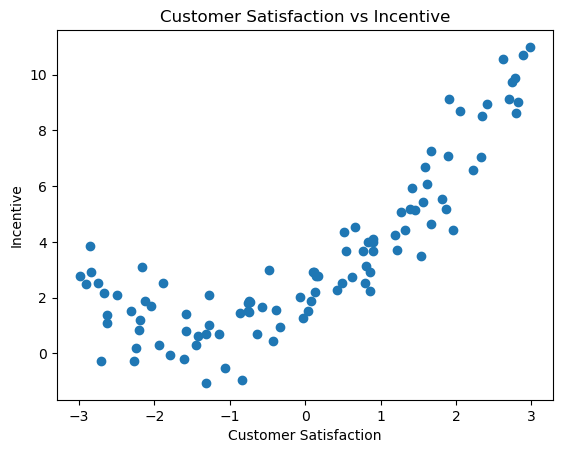

In [10]:
# scatter plot of the data customer_satisfaction (x) vs incentive (y)
plt.scatter(df['customer_satisfaction'], df['incentive'])
plt.xlabel('Customer Satisfaction')
plt.ylabel('Incentive')
plt.title('Customer Satisfaction vs Incentive')
plt.show()

In [11]:
# split the data into features and target variables
X = df[['customer_satisfaction']]
y = df['incentive']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (80, 1)
X_test shape: (20, 1)


In [12]:
X_train.head()

,customer_satisfaction
55,-1.145369
88,1.863312
26,0.893379
42,-2.042095
69,-1.070874


In [13]:
y_train.head()

55    0.702395
88    5.181608
26    4.114511
42    1.705625
69   -0.547482
Name: incentive, dtype: float64

In [ ]:
#scale the features with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create linear model without polynomial features first 
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate metrics for linear model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Model Mean Squared Error:", mse_linear)
print("Linear Model R^2 Score:", r2_linear)

Linear Model Mean Squared Error: 3.108624331735999
Linear Model R^2 Score: 0.7373721952395638


Linear Model Coefficients: [2.16839402]
Linear Model Intercept: 3.352067425968704


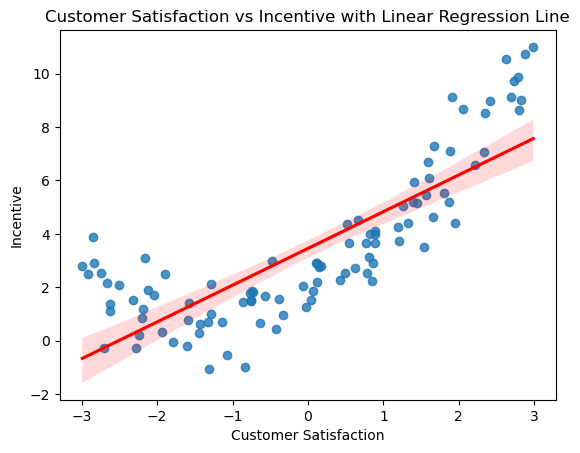

In [16]:
# See the coefficients and intercept of the linear model and see seaborn regression plot
print("Linear Model Coefficients:", linear_model.coef_)
print("Linear Model Intercept:", linear_model.intercept_)

sns.regplot(x=df['customer_satisfaction'], y=df['incentive'], line_kws={"color": "red"})
plt.xlabel('Customer Satisfaction')
plt.ylabel('Incentive')
plt.title('Customer Satisfaction vs Incentive with Linear Regression Line')
plt.show()

----------------------------

In [21]:
# Lets do it with polynomial features now
# Create polynomial features

poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)  # You can change the degree and interaction_only as needed

# include_bias means it will include the bias (intercept) term in the output
# interaction_only=False means it will include all polynomial terms, not just interaction terms

In [22]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [23]:
X_train_poly

array([[ 1.00000000e+00, -6.64404752e-01,  4.41433674e-01],
       [ 1.00000000e+00,  1.14156007e+00,  1.30315938e+00],
       [ 1.00000000e+00,  5.59356250e-01,  3.12879414e-01],
       [ 1.00000000e+00, -1.20266557e+00,  1.44640448e+00],
       [ 1.00000000e+00, -6.19689337e-01,  3.84014875e-01],
       [ 1.00000000e+00, -9.39000619e-01,  8.81722162e-01],
       [ 1.00000000e+00,  8.16491235e-01,  6.66657937e-01],
       [ 1.00000000e+00,  5.41811047e-01,  2.93559211e-01],
       [ 1.00000000e+00, -1.55655545e+00,  2.42286487e+00],
       [ 1.00000000e+00, -1.32379297e+00,  1.75242784e+00],
       [ 1.00000000e+00,  8.93298400e-01,  7.97982031e-01],
       [ 1.00000000e+00,  5.19159804e-01,  2.69526902e-01],
       [ 1.00000000e+00, -1.27309326e+00,  1.62076644e+00],
       [ 1.00000000e+00,  7.38015668e-01,  5.44667126e-01],
       [ 1.00000000e+00,  5.09624355e-01,  2.59716983e-01],
       [ 1.00000000e+00, -7.64084303e-01,  5.83824822e-01],
       [ 1.00000000e+00, -1.47875352e+00

In [24]:
# create and train the linear regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [25]:

# Predict on the test set with polynomial features
y_pred_poly = poly_model.predict(X_test_poly)

In [26]:
# see the coefficients and intercept of the polynomial model
print("Polynomial Model Coefficients:", poly_model.coef_)
print("Polynomial Model Intercept:", poly_model.intercept_)

Polynomial Model Coefficients: [0.         2.35314971 1.47232173]
Polynomial Model Intercept: 1.8797456957460261


In [27]:
#see the metrics for polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Model Mean Squared Error:", mse_poly)
print("Polynomial Model R^2 Score:", r2_poly)

Polynomial Model Mean Squared Error: 0.43506694338033264
Polynomial Model R^2 Score: 0.9632439741601065


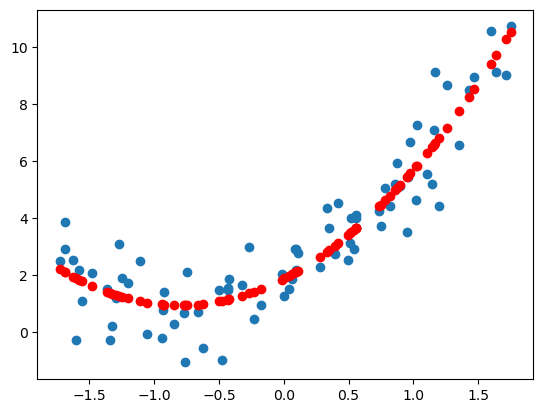

In [ ]:
# see the scatter plot 
# Here we plot the training data and the polynomial regression line
# We can see that the polynomial regression line fits the data better than the linear regression line

plt.scatter(X_train, y_train)
plt.scatter(X_train, poly_model.predict(X_train_poly), color = "r")
plt.show()

Polynomial Degree 3 Model Mean Squared Error: 0.4008007317527622
Polynomial Degree 3 Model R^2 Score: 0.9661389074093036


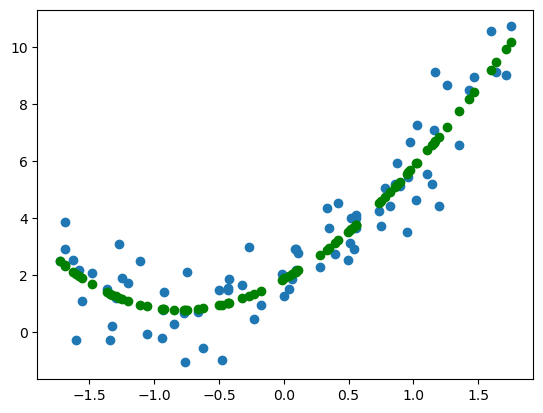

In [30]:
# try with different degreees

poly_degree3 = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)  # You can change the degree and interaction_only as needed

X_train_poly3 = poly_degree3.fit_transform(X_train)
X_test_poly3 = poly_degree3.transform(X_test)

poly_model3 = LinearRegression()

poly_model3.fit(X_train_poly3, y_train)
y_pred_poly3 = poly_model3.predict(X_test_poly3)

mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

print("Polynomial Degree 3 Model Mean Squared Error:", mse_poly3)
print("Polynomial Degree 3 Model R^2 Score:", r2_poly3)

# see the scatter plot for degree 3
plt.scatter(X_train, y_train)
plt.scatter(X_train, poly_model3.predict(X_train_poly3), color = "g")
plt.show()


